In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
train_df = pd.read_csv("stage_1_train.csv").drop_duplicates()
train_df['Image'] = train_df['ID'].str.slice(stop=12)
train_df['Diagnosis'] = train_df['ID'].str.slice(start=13)
train_labels = train_df.pivot(index="Image", columns="Diagnosis", values="Label")
train_labels.reset_index(inplace = True)
train_labels.head()

Diagnosis,Image,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
0,ID_000039fa0,0,0,0,0,0,0
1,ID_00005679d,0,0,0,0,0,0
2,ID_00008ce3c,0,0,0,0,0,0
3,ID_0000950d7,0,0,0,0,0,0
4,ID_0000aee4b,0,0,0,0,0,0


In [3]:
train_labels.shape

(674258, 7)

In [18]:
train_diag_vals = train_labels[train_labels.columns[1:]]

In [24]:
train_diag_cnt = train_diag_vals.sum(axis = 0)
train_diag_cnt

Diagnosis
any                 97103
epidural             2761
intraparenchymal    32564
intraventricular    23766
subarachnoid        32122
subdural            42496
dtype: int64

In [25]:
total_images_cnt = train_labels.shape[0]

In [26]:
train_diag_cnt["nothing"] = total_images_cnt - train_diag_cnt["any"]
train_diag_cnt

Diagnosis
any                  97103
epidural              2761
intraparenchymal     32564
intraventricular     23766
subarachnoid         32122
subdural             42496
nothing             577155
dtype: int64

<BarContainer object of 7 artists>

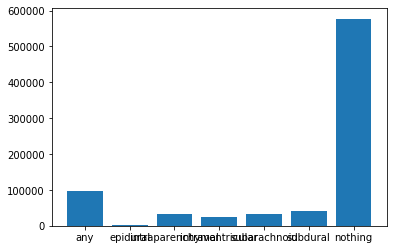

In [59]:
plt.bar(train_diag_cnt.index, train_diag_cnt.values)

([<matplotlib.patches.Wedge at 0x14b2d34de08>,
 [Text(0.9893237035659024, 0.4808727581831255, 'any'),
  Text(-0.9893236810546229, -0.4808728044967098, 'nothing')],
 [Text(0.5396311110359466, 0.26229423173625027, '14.4%'),
  Text(-0.5396310987570669, -0.2622942569982053, '85.6%')])

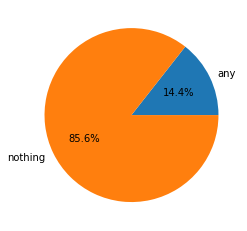

In [36]:
plt.pie(train_diag_cnt[['any', 'nothing']].values, labels = train_diag_cnt[['any', 'nothing']].index , autopct='%0.1f%%')

<BarContainer object of 6 artists>

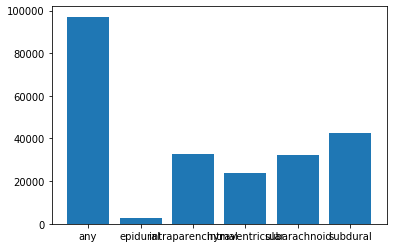

In [37]:
plt.bar(train_diag_cnt.index[:-1], train_diag_cnt.values[:-1])

<BarContainer object of 5 artists>

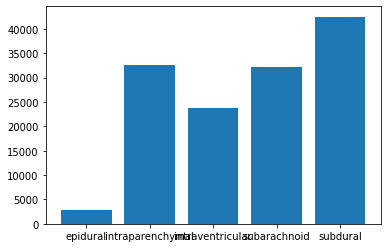

In [60]:
plt.bar(train_diag_cnt.index[1:-1], train_diag_cnt.values[1:-1])

([<matplotlib.patches.Wedge at 0x14b52962748>,
 [Text(1.0976862219781875, 0.07130889200691236, 'epidural'),
  Text(0.6881917153486619, 0.8581329517769765, 'intraparenchymal'),
  Text(-0.663582197587537, 0.877301924678668, 'intraventricular'),
  Text(-1.0174367835509002, -0.41811767659069266, 'subarachnoid'),
  Text(0.595743313000813, -0.9247107142316541, 'subdural')],
 [Text(0.5987379392608295, 0.038895759276497646, '2.1%'),
  Text(0.37537729928108826, 0.468072519151078, '24.4%'),
  Text(-0.36195392595683834, 0.4785283225520007, '17.8%'),
  Text(-0.5549655183004909, -0.22806418723128688, '24.0%'),
  Text(0.32495089800044336, -0.5043876623081749, '31.8%')])

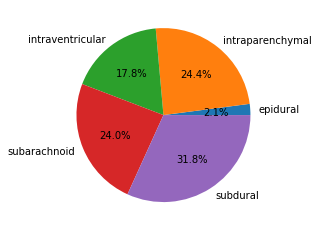

In [61]:
plt.pie(train_diag_cnt.values[1:-1], labels = train_diag_cnt.index[1:-1] , autopct='%0.1f%%')

In [63]:
df = pd.read_csv("train_metadata.csv")
df.head()

,Image,BitsAllocated,BitsStored,Columns,HighBit,ImageOrientationPatient_0,ImageOrientationPatient_1,ImageOrientationPatient_2,ImageOrientationPatient_3,ImageOrientationPatient_4,...,RescaleIntercept,RescaleSlope,Rows,SOPInstanceUID,SamplesPerPixel,SeriesInstanceUID,StudyID,StudyInstanceUID,WindowCenter,WindowWidth
0,ID_000039fa0,16,16,512,15,1.0,0.0,0.0,0.0,0.968148,...,-1024.0,1.0,512,ID_000039fa0,1,ID_5f8484c3e0,NaN,ID_134d398b61,30.0,80.0
1,ID_00005679d,16,16,512,15,1.0,0.0,0.0,0.0,1.000000,...,-1024.0,1.0,512,ID_00005679d,1,ID_203cd6ec46,NaN,ID_b5c26cda09,50.0,100.0
2,ID_00008ce3c,16,12,512,11,1.0,0.0,0.0,0.0,0.994522,...,-1024.0,1.0,512,ID_00008ce3c,1,ID_3780d48b28,NaN,ID_974735bf79,40.0,80.0
3,ID_0000950d7,16,16,512,15,1.0,0.0,0.0,0.0,1.000000,...,-1024.0,1.0,512,ID_0000950d7,1,ID_84296c3845,NaN,ID_8881b1c4b1,35.0,135.0
4,ID_0000aee4b,16,12,512,11,1.0,0.0,0.0,0.0,1.000000,...,-1024.0,1.0,512,ID_0000aee4b,1,ID_1e59488a44,NaN,ID_9aad90e421,36.0,80.0


In [64]:
image_study = df[['Image', 'StudyInstanceUID']]
image_study.head()

,Image,StudyInstanceUID
0,ID_000039fa0,ID_134d398b61
1,ID_00005679d,ID_b5c26cda09
2,ID_00008ce3c,ID_974735bf79
3,ID_0000950d7,ID_8881b1c4b1
4,ID_0000aee4b,ID_9aad90e421


In [65]:
label2 = pd.merge(image_study, train_labels, on = 'Image')
label2.head()

,Image,StudyInstanceUID,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
0,ID_000039fa0,ID_134d398b61,0,0,0,0,0,0
1,ID_00005679d,ID_b5c26cda09,0,0,0,0,0,0
2,ID_00008ce3c,ID_974735bf79,0,0,0,0,0,0
3,ID_0000950d7,ID_8881b1c4b1,0,0,0,0,0,0
4,ID_0000aee4b,ID_9aad90e421,0,0,0,0,0,0


In [66]:
label2.shape

(674258, 8)

In [81]:
tmp = label2[label2['epidural'] == 1][['Image', 'StudyInstanceUID']]
epidurals = pd.DataFrame()
epidurals['path'] = tmp['StudyInstanceUID'] + '/' + tmp['Image'] + '.png'
epidurals.to_csv("epidurals.csv")
print(epidurals.shape)
epidurals.head()

(2761, 1)


,path
237,ID_ae19417cc9/ID_00178eb80.png
280,ID_2277a44c5b/ID_001bb2c00.png
392,ID_7ce7574769/ID_0026de01c.png
733,ID_da3069ae8c/ID_004966e2d.png
766,ID_47d087d9c2/ID_004c4b319.png


In [82]:
tmp = label2[label2['intraparenchymal'] == 1][['Image', 'StudyInstanceUID']]
intraparenchymals = pd.DataFrame()
intraparenchymals['path'] = tmp['StudyInstanceUID'] + '/' + tmp['Image'] + '.png'
intraparenchymals.to_csv("intraparenchymals.csv")
print(intraparenchymals.shape)
intraparenchymals.head()

(32564, 1)


,path
12,ID_b026766696/ID_0002081b6.png
75,ID_6ab681c35f/ID_00083d407.png
86,ID_d303deb5fc/ID_00094b19b.png
92,ID_406ffd81bc/ID_0009e5f5e.png
130,ID_f452d76997/ID_000d69988.png


In [83]:
tmp = label2[label2['intraventricular'] == 1][['Image', 'StudyInstanceUID']]
intraventriculars = pd.DataFrame()
intraventriculars['path'] = tmp['StudyInstanceUID'] + '/' + tmp['Image'] + '.png'
intraventriculars.to_csv("intraventriculars.csv")
print(intraventriculars.shape)
intraventriculars.head()

(23766, 1)


,path
31,ID_050fb6fd74/ID_00042829c.png
47,ID_a7908d3bb7/ID_0005d340e.png
91,ID_f935a12158/ID_0009db386.png
172,ID_195a240531/ID_0011f02f5.png
174,ID_f6adeacda4/ID_001212532.png


In [84]:
tmp = label2[label2['subarachnoid'] == 1][['Image', 'StudyInstanceUID']]
subarachnoids = pd.DataFrame()
subarachnoids['path'] = tmp['StudyInstanceUID'] + '/' + tmp['Image'] + '.png'
subarachnoids.to_csv("subarachnoids.csv")
print(subarachnoids.shape)
subarachnoids.head()

(32122, 1)


,path
21,ID_74f2e4ee2b/ID_0002a38ad.png
43,ID_8c4d387064/ID_00058bb06.png
47,ID_a7908d3bb7/ID_0005d340e.png
81,ID_5b40dcf014/ID_0008d8433.png
86,ID_d303deb5fc/ID_00094b19b.png


In [85]:
tmp = label2[label2['subdural'] == 1][['Image', 'StudyInstanceUID']]
subdurals = pd.DataFrame()
subdurals['path'] = tmp['StudyInstanceUID'] + '/' + tmp['Image'] + '.png'
subdurals.to_csv("subdurals.csv")
print(subdurals.shape)
subdurals.head()

(42496, 1)


,path
21,ID_74f2e4ee2b/ID_0002a38ad.png
28,ID_ab4ab2bb1d/ID_000346ce2.png
37,ID_877f6529e9/ID_0004a5701.png
65,ID_796b0d5cfe/ID_000744022.png
71,ID_4ae3f29d01/ID_0007b8af4.png


In [86]:
tmp = label2[label2['any'] == 1][['Image', 'StudyInstanceUID']]
anys = pd.DataFrame()
anys['path'] = tmp['StudyInstanceUID'] + '/' + tmp['Image'] + '.png'
anys.to_csv("anys.csv")
print(anys.shape)
anys.head()

(97103, 1)


,path
12,ID_b026766696/ID_0002081b6.png
21,ID_74f2e4ee2b/ID_0002a38ad.png
28,ID_ab4ab2bb1d/ID_000346ce2.png
31,ID_050fb6fd74/ID_00042829c.png
37,ID_877f6529e9/ID_0004a5701.png


In [87]:
tmp = label2[label2['any'] == 0][['Image', 'StudyInstanceUID']]
nothings = pd.DataFrame()
nothings['path'] = tmp['StudyInstanceUID'] + '/' + tmp['Image'] + '.png'
nothings.to_csv("nothings.csv")
print(nothings.shape)
nothings.head()

(577155, 1)


,path
0,ID_134d398b61/ID_000039fa0.png
1,ID_b5c26cda09/ID_00005679d.png
2,ID_974735bf79/ID_00008ce3c.png
3,ID_8881b1c4b1/ID_0000950d7.png
4,ID_9aad90e421/ID_0000aee4b.png
